###Data loading

The data used to train the model is obtain from the 
Stanford Dogs Dataset. The data will be loaded tranformed as necessary ready for training, the data is uploaded to google drive.

#Mount the drive

In [ ]:

#mount the drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


#unzip drive data and download to root mem

In [ ]:
#unzip data in the drive
#train
!unzip '/content/drive/MyDrive/APS360 Project/used_data/train.zip' -d '/root/train'
#!unzip '/content/drive/MyDrive/APS360 Project/used_data/130_breeds.zip' -d '/root/train' 



Streaming output truncated to the last 5000 lines.
  inflating: /root/train/train/n02100877-Irish_setter/n02100877_257.jpg  
  inflating: /root/train/__MACOSX/train/n02100877-Irish_setter/._n02100877_257.jpg  
  inflating: /root/train/train/n02100877-Irish_setter/n02100877_3463.jpg  
  inflating: /root/train/__MACOSX/train/n02100877-Irish_setter/._n02100877_3463.jpg  
  inflating: /root/train/train/n02100877-Irish_setter/n02100877_2741.jpg  
  inflating: /root/train/__MACOSX/train/n02100877-Irish_setter/._n02100877_2741.jpg  
  inflating: /root/train/train/n02100877-Irish_setter/n02100877_1062.jpg  
  inflating: /root/train/__MACOSX/train/n02100877-Irish_setter/._n02100877_1062.jpg  
  inflating: /root/train/train/n02100877-Irish_setter/n02100877_916.jpg  
  inflating: /root/train/__MACOSX/train/n02100877-Irish_setter/._n02100877_916.jpg  
  inflating: /root/train/train/n02100877-Irish_setter/n02100877_123.jpg  
  inflating: /root/train/__MACOSX/train/n02100877-Irish_setter/._n02100877

In [ ]:
#unzip data in the drive
!unzip '/content/drive/MyDrive/APS360 Project/used_data/val.zip' -d '/root/val'

Streaming output truncated to the last 5000 lines.
  inflating: /root/val/__MACOSX/val/n02088632-bluetick/._n02088632_1636.jpg  
  inflating: /root/val/val/n02088632-bluetick/n02088632_28.jpg  
  inflating: /root/val/__MACOSX/val/n02088632-bluetick/._n02088632_28.jpg  
  inflating: /root/val/val/n02088632-bluetick/n02088632_2439.jpg  
  inflating: /root/val/__MACOSX/val/n02088632-bluetick/._n02088632_2439.jpg  
  inflating: /root/val/val/n02088632-bluetick/n02088632_70.jpg  
  inflating: /root/val/__MACOSX/val/n02088632-bluetick/._n02088632_70.jpg  
  inflating: /root/val/val/n02088632-bluetick/n02088632_2837.jpg  
  inflating: /root/val/__MACOSX/val/n02088632-bluetick/._n02088632_2837.jpg  
  inflating: /root/val/val/n02088632-bluetick/n02088632_1047.jpg  
  inflating: /root/val/__MACOSX/val/n02088632-bluetick/._n02088632_1047.jpg  
  inflating: /root/val/val/n02088632-bluetick/n02088632_3640.jpg  
  inflating: /root/val/__MACOSX/val/n02088632-bluetick/._n02088632_3640.jpg  
  inflati

In [ ]:
#test
!unzip '/content/drive/MyDrive/APS360 Project/used_data/test.zip' -d '/root/test' 

Streaming output truncated to the last 5000 lines.
  inflating: /root/test/__MACOSX/test/n02113186-Cardigan/._n02113186_3857.jpg  
  inflating: /root/test/test/n02113186-Cardigan/n02113186_13102.jpg  
  inflating: /root/test/__MACOSX/test/n02113186-Cardigan/._n02113186_13102.jpg  
  inflating: /root/test/test/n02113186-Cardigan/n02113186_9809.jpg  
  inflating: /root/test/__MACOSX/test/n02113186-Cardigan/._n02113186_9809.jpg  
  inflating: /root/test/test/n02113186-Cardigan/n02113186_11658.jpg  
  inflating: /root/test/__MACOSX/test/n02113186-Cardigan/._n02113186_11658.jpg  
  inflating: /root/test/test/n02113186-Cardigan/n02113186_5819.jpg  
  inflating: /root/test/__MACOSX/test/n02113186-Cardigan/._n02113186_5819.jpg  
  inflating: /root/test/test/n02113186-Cardigan/n02113186_4859.jpg  
  inflating: /root/test/__MACOSX/test/n02113186-Cardigan/._n02113186_4859.jpg  
  inflating: /root/test/test/n02113186-Cardigan/n02113186_9615.jpg  
  inflating: /root/test/__MACOSX/test/n02113186-Car

#Start data loading process

###Necessary

In [ ]:
import time
import os
import numpy as np
import torch

import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt

###Obtain data paths

In [ ]:
#Testing model, use all dataset as training

train_dir = os.path.join('/root/train/train')
val_dir = os.path.join('/root/val/val')
test_dir = os.path.join('/root/test/test')

# classes are folders in each directory with names of dog breeds
import pandas as pd 
df = pd.read_csv("/content/drive/MyDrive/APS360 Project/used_data/dog breed classes.csv")


###Classes

In [ ]:
classes = df.values.tolist()
num_classes = len(classes)
num_classes
df

,dog breeds
0,n-Chihuahua
1,n-Japanese_spaniel
2,n-Maltese_dog
3,n-Pekinese
4,n-Shih-Tzu
...,...
115,n-standard_poodle
116,n-Mexican_hairless
117,n-dingo
118,n-dhole


###Load and transform the data

In [ ]:
# load and transform data using ImageFolder
# resize all images to 224 x 224
'''
These are other resize options that are available: 
data_transform = transforms.Compose([transforms.RandomResizedCrop(224), 
                                      transforms.ToTensor()])
^^^ random resize, it could be biased to a corner et cetera
data_transform = transforms.Compose([transforms.Resize(224), 
                                      transforms.ToTensor()])
                                      
                                      '''

data_transform = transforms.Compose([transforms.CenterCrop([224,224]), 
                                      transforms.ToTensor()])
#normalize = transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))

train_data = datasets.ImageFolder(train_dir, transform=data_transform)
val_data = datasets.ImageFolder(val_dir, transform=data_transform)
test_data = datasets.ImageFolder(test_dir, transform=data_transform)

# print out some data stats
print('Num training images: ', len(train_data))#
print('Num validation images: ', len(val_data))
print('Num Test images: ', len(test_data))

Num training images:  12307
Num validation images:  4072
Num Test images:  4201


###The dataloader

In [ ]:
# define dataloader parameters
# Dataloader data in organized in batches hence len of train_loader =
#len(train_data/ batch_size)
batch_size  = 327 # making it 20 batches total
num_workers = 0

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, 
                                           num_workers=num_workers, shuffle=True)
#batch_size  = 509 # making it 20 batches total
val_loader = torch.utils.data.DataLoader(val_data, batch_size=batch_size, 
                                          num_workers=num_workers, shuffle=True)
#batch_size  = 327 # making it 20 batches total
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
                                          num_workers=num_workers, shuffle=True)

#number of batches
print("training:   ", len(train_loader))
print("validation: ", len(val_loader))
print("test:       ", len(test_loader))

training:    38
validation:  13
test:        13


#Visualize the loaded data

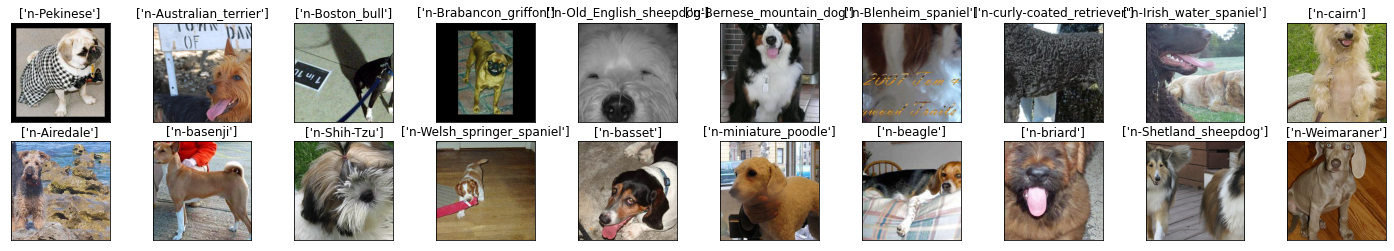

In [ ]:
#visualize some images, sanity check
# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy() # convert images to numpy for display

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
  ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
  plt.imshow(np.transpose(images[idx], (1, 2, 0)))
  ax.set_title(classes[labels[idx]])

In [ ]:
dataiter = iter(val_loader)
images, labels = dataiter.next()
#images = images.numpy() # convert images to numpy for display
len(images),images.shape

#Building CNN from scratch

###Necessary

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt # for plotting
import torch.optim as optim #for gradient descent

###The model

In [ ]:
class BreedClassifier(nn.Module):
  def __init__ (self):
      super(BreedClassifier, self).__init__()
      self.name = 'breed_classifier'
      self.conv1 = nn.Conv2d(3,10,3,2) #in_channels, out_chanels, kernel_size, stride
      self.pool = nn.MaxPool2d(2,2) #kernel_size, stride 
      self.conv2 = nn.Conv2d(10,9,3,2)
      self.conv3 = nn.Conv2d(9,8,3)
      self.fc1 = nn.Linear(8 * 5 * 5, 240) #121, 10, 55, 55,432432
      self.fc2 = nn.Linear(240,120)

  def forward(self,image):
      image = self.pool(F.relu(self.conv1(image)))
      image = self.pool(F.relu(self.conv2(image)))
      image = self.pool(F.relu(self.conv3(image)))
      x = image.view(-1, 8 * 5 * 5) # flatten before passing it to fully connected layers
      x = F.relu(self.fc1(x))
      x = self.fc2(x)
      x = x.squeeze(1)
      return x

In [ ]:
breed_classifier = BreedClassifier()

###Model summary

In [ ]:
from torchsummary import summary
breed_classifier.cuda()
summary(breed_classifier,(3,224,224))



----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 10, 111, 111]             280
         MaxPool2d-2           [-1, 10, 55, 55]               0
            Conv2d-3            [-1, 9, 27, 27]             819
         MaxPool2d-4            [-1, 9, 13, 13]               0
            Conv2d-5            [-1, 8, 11, 11]             656
         MaxPool2d-6              [-1, 8, 5, 5]               0
            Linear-7                  [-1, 240]          48,240
            Linear-8                  [-1, 120]          28,920
Total params: 78,915
Trainable params: 78,915
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.57
Forward/backward pass size (MB): 1.24
Params size (MB): 0.30
Estimated Total Size (MB): 2.12
----------------------------------------------------------------


###Evaluating model's accuracy

In [ ]:
#for evaluating the model

def get_accuracy(model, train=False):
    if train:
        data_loader = train_loader
    else:
        data_loader = val_loader

    correct = 0
    total = 0
    for imgs, labels in data_loader:
        
         
        #############################################
        #To Enable GPU Usage
        if use_cuda and torch.cuda.is_available():
          imgs = imgs.cuda()
          #print('nope')
          labels = labels.cuda()
        #############################################
        
        output = model(imgs)
        
        #select index with maximum prediction score
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += imgs.shape[0]
    return correct / total

###Training

In [ ]:
def train_from_scratch(model, data, batch_size=327, num_epochs=1):

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.01)

    iters, losses, train_acc, val_acc = [], [], [], []

    # training
    n = 0 # the number of iterations
    start_time=time.time()
    for epoch in range(num_epochs):
        mini_b=0
        mini_batch_correct = 0
        Mini_batch_total = 0
        for imgs, labels in iter(data): #### watch this one
            
            #print(len(data))
            #############################################
            #To Enable GPU Usage
            if use_cuda and torch.cuda.is_available():
              imgs = imgs.cuda()
              labels = labels.cuda()
            #############################################

          #### ALNC is alexNet.features (AlexNet without classifier) ####
          
            out = model(imgs)
            #out = torch.reshape(out, (-1,))             # forward pass
            loss = criterion(out, labels) # compute the total loss
            loss.backward()               # backward pass (compute parameter updates)
            optimizer.step()              # make the updates for each parameter
            optimizer.zero_grad()         # a clean up step for PyTorch



            ##### Mini_batch Accuracy ##### We don't compute accuracy on the whole trainig set in every iteration!
            pred = out.max(1, keepdim=True)[1]
            mini_batch_correct = pred.eq(labels.view_as(pred)).sum().item()
            Mini_batch_total = imgs.shape[0]
            train_acc.append((mini_batch_correct / Mini_batch_total))
           ###########################

          # save the current training information
            iters.append(n)
            losses.append(float(loss)/batch_size)             # compute *average* loss
            val_acc.append(get_accuracy(model, train=False))  # compute validation accuracy
            n += 1
            mini_b += 1
            print("Iteration: ",n,'Progress: % 6.2f ' % ((epoch * len(train_loader) + mini_b) / (num_epochs * len(train_loader))*100),'%', "Time Elapsed: % 6.2f s " % (time.time()-start_time))


        print ("Epoch %d Finished. " % epoch ,"Time per Epoch: % 6.2f s "% ((time.time()-start_time) / (epoch +1)))


    end_time= time.time()
    # plotting
    plt.title("Training Curve")
    plt.plot(iters, losses, label="Train")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()

    plt.title("Training Curve")
    plt.plot(iters, train_acc, label="Training")
    plt.plot(iters, val_acc, label="Validation")    
    plt.xlabel("Iterations")
    plt.ylabel("Validation Accuracy")
    plt.legend(loc='best')
    plt.show()

    train_acc.append(get_accuracy(model, train=True))
    print("Final Training Accuracy: {}".format(train_acc[-1]))
    print("Final Validation Accuracy: {}".format(val_acc[-1]))
    print ("Total time:  % 6.2f s  Time per Epoch: % 6.2f s " % ( (end_time-start_time), ((end_time-start_time) / num_epochs) ))

###Model's performance
i. After training for five epochs the training/ validation accuracy was about 9%.

CUDA is available!  Training on GPU ...
Iteration:  1 Progress:   0.53  % Time Elapsed:  15.57 s 
Iteration:  2 Progress:   1.05  % Time Elapsed:  31.15 s 
Iteration:  3 Progress:   1.58  % Time Elapsed:  46.86 s 
Iteration:  4 Progress:   2.11  % Time Elapsed:  62.73 s 
Iteration:  5 Progress:   2.63  % Time Elapsed:  78.23 s 
Iteration:  6 Progress:   3.16  % Time Elapsed:  93.98 s 
Iteration:  7 Progress:   3.68  % Time Elapsed:  109.70 s 
Iteration:  8 Progress:   4.21  % Time Elapsed:  125.45 s 
Iteration:  9 Progress:   4.74  % Time Elapsed:  141.32 s 
Iteration:  10 Progress:   5.26  % Time Elapsed:  157.13 s 
Iteration:  11 Progress:   5.79  % Time Elapsed:  172.78 s 
Iteration:  12 Progress:   6.32  % Time Elapsed:  188.56 s 
Iteration:  13 Progress:   6.84  % Time Elapsed:  204.42 s 
Iteration:  14 Progress:   7.37  % Time Elapsed:  219.96 s 
Iteration:  15 Progress:   7.89  % Time Elapsed:  235.47 s 
Iteration:  16 Progress:   8.42  % Time Elapsed:  250.99 s 
Iteration:  17 

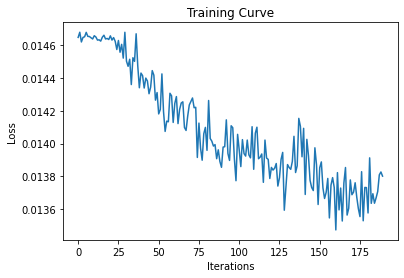

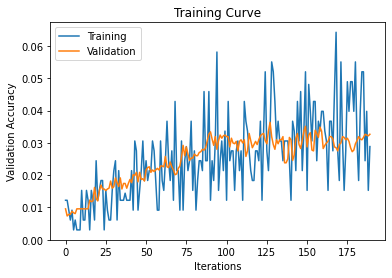

Final Training Accuracy: 0.042496140407897946
Final Validation Accuracy: 0.03266208251473477
Total time:   2917.69 s  Time per Epoch:  583.54 s 


In [ ]:
#model's performance

model = BreedClassifier()

use_cuda = True

if use_cuda and torch.cuda.is_available():
  model.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

train_from_scratch(model, train_loader, batch_size=327, num_epochs=5)

In [ ]:
breed_classifier = model

#Introduce Transfer Learning
i.  AlexNet

ii. resnet

iii. wide_resnet

iv. EfficientNet

In [ ]:
#import models
import torchvision.models as models
#alexnet = models.alexnet(pretrained=True)
resnet = models.resnet18(pretrained=True)
#wide_resnet = models.wide_resnet50_2(pretrained=True)
#efficientnet = models.efficientnet_b7(pretrained=True)


#torch.manual_seed(1) # set the random seed


# obtain one batch of training images
#dataiter = iter(val_loader)
#images, labels = dataiter.next()

# confirm output from AlexNet and resnet feature extraction
#alex
#alexnet_features = alexnet.features(images)
#print(alexnet_features.shape)
#resnet
#num_resnet_features = resnet.fc.in_features
#wide_resnet
#num_wide_resnet_features = wide_resnet.fc.in_features




Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

#Alexnet

In [ ]:
alexnet

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

##Customize alexnet to fit our task

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt # for plotting
import torch.optim as optim #for gradient descent


###Freeze parameters and updadate the last connected layer

In [ ]:
#freeze model parameters the last 1000
for param in alexnet.parameters():
  param.requires_grad = False

In [ ]:
# Change the final layer of AlexNet Model for Transfer Learning
alexnet.classifier.add_module("4", nn.Linear(4096, 512)) #softmax not added because we're using crossentropy
alexnet.classifier.add_module("6", nn.Dropout(p=0.5, inplace=False)) 
alexnet.classifier.add_module("7", nn.Linear(512, 256)) 
alexnet.classifier.add_module("8", nn.ReLU(inplace=True)) 
alexnet.classifier.add_module("9", nn.Linear(256, num_classes))
alexnet

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

###Model summary

In [ ]:
alexnet.cuda()
from torchsummary import summary
summary(alexnet,(3,224,224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 55, 55]          23,296
              ReLU-2           [-1, 64, 55, 55]               0
         MaxPool2d-3           [-1, 64, 27, 27]               0
            Conv2d-4          [-1, 192, 27, 27]         307,392
              ReLU-5          [-1, 192, 27, 27]               0
         MaxPool2d-6          [-1, 192, 13, 13]               0
            Conv2d-7          [-1, 384, 13, 13]         663,936
              ReLU-8          [-1, 384, 13, 13]               0
            Conv2d-9          [-1, 256, 13, 13]         884,992
             ReLU-10          [-1, 256, 13, 13]               0
           Conv2d-11          [-1, 256, 13, 13]         590,080
             ReLU-12          [-1, 256, 13, 13]               0
        MaxPool2d-13            [-1, 256, 6, 6]               0
AdaptiveAvgPool2d-14            [-1, 25

#Resnet

In [ ]:
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

##Customize resnet to fit our task

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt # for plotting
import torch.optim as optim #for gradient descent

###Freeze weights

In [ ]:
#freeze model parameters the last 1000
for param in resnet.parameters():
  param.requires_grad = False

###Update resnet fcc

In [ ]:
# Change the final layer of AlexNet Model for Transfer Learning
num_resnet_features = 512
resnet.fc = nn.Linear(num_resnet_features, num_classes)

#alexnet.classifier.add_module("7", nn.LogSoftmax(dim = 1)) #softmax not added because we're using crossentropy
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

###Model's Summary

In [ ]:
resnet.cuda()
from torchsummary import summary
summary(resnet,(3,224,224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]          36,864
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
       BasicBlock-11           [-1, 64, 56, 56]               0
           Conv2d-12           [-1, 64, 56, 56]          36,864
      BatchNorm2d-13           [-1, 64, 56, 56]             128
             ReLU-14           [-1, 64,

#Wide_resnet
consider unfreezing alexnet weights and see if there's any change or freezing some and not others

##original

In [ ]:
wide_resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(128, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), strid

##Customize wide_resnet to fit out task

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt # for plotting
import torch.optim as optim #for gradient descent

###Freeze wide_resnet features and update the fcc layer, consider removing the freezing

In [ ]:
#freeze model parameters the last 1000
for param in wide_resnet.parameters():
  param.requires_grad = False

In [ ]:
# Change the final layer of wide_resnet Model for Transfer Learning
num_wide_resnet_features = 2048
wide_resnet.fc = nn.Linear(num_wide_resnet_features, num_classes)
#alexnet.classifier.add_module("7", nn.LogSoftmax(dim = 1)) #softmax not added because we're using crossentropy
wide_resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(128, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), strid

##Model summary

In [ ]:
wide_resnet.cuda()
from torchsummary import summary
summary(wide_resnet,(3,224,224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5          [-1, 128, 56, 56]           8,192
       BatchNorm2d-6          [-1, 128, 56, 56]             256
              ReLU-7          [-1, 128, 56, 56]               0
            Conv2d-8          [-1, 128, 56, 56]         147,456
       BatchNorm2d-9          [-1, 128, 56, 56]             256
             ReLU-10          [-1, 128, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]          32,768
      BatchNorm2d-12          [-1, 256, 56, 56]             512
           Conv2d-13          [-1, 256, 56, 56]          16,384
      BatchNorm2d-14          [-1, 256,

#Efficientnet

In [ ]:
efficientnet


EfficientNet(
  (features): Sequential(
    (0): ConvNormActivation(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(64, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): ConvNormActivation(
            (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=64, bias=False)
            (1): BatchNorm2d(64, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(64, 16, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): ConvNormActivatio

##Customize efficientnet to fit our task

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt # for plotting
import torch.optim as optim #for gradient descent

###Freeeze weights, might unfreeze later

In [ ]:
#freeze model parameters the last 1000
for param in efficientnet.parameters():
  param.requires_grad = False

###Update fcc

In [ ]:
# Change the final layers of effnet Model for Transfer Learning

efficientnet.classifier.add_module("2", nn.Linear(1000, 250))
efficientnet.classifier.add_module("3", nn.Dropout(p=0.5, inplace = True)) 
efficientnet.classifier.add_module("4", nn.SiLU(inplace=True))  
efficientnet.classifier.add_module("5", nn.Linear(250, num_classes))
efficientnet

EfficientNet(
  (features): Sequential(
    (0): ConvNormActivation(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(64, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): ConvNormActivation(
            (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=64, bias=False)
            (1): BatchNorm2d(64, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(64, 16, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): ConvNormActivatio

###Model summary

In [ ]:
efficientnet.cuda()
from torchsummary import summary
summary(efficientnet,(3,224,224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           1,728
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              SiLU-3         [-1, 64, 112, 112]               0
            Conv2d-4         [-1, 64, 112, 112]             576
       BatchNorm2d-5         [-1, 64, 112, 112]             128
              SiLU-6         [-1, 64, 112, 112]               0
 AdaptiveAvgPool2d-7             [-1, 64, 1, 1]               0
            Conv2d-8             [-1, 16, 1, 1]           1,040
              SiLU-9             [-1, 16, 1, 1]               0
           Conv2d-10             [-1, 64, 1, 1]           1,088
          Sigmoid-11             [-1, 64, 1, 1]               0
SqueezeExcitation-12         [-1, 64, 112, 112]               0
           Conv2d-13         [-1, 32, 112, 112]           2,048
      BatchNorm2d-14         [-1, 32, 1

#Transfer model's accuracy

In [ ]:
#for evaluating the model

def get_accuracy_of_transfer(model, train=False):
    if train:
        data_loader = train_loader
    else:
        data_loader = val_loader
    
    #data_loader = train_loader  #might need to use the the if_statement later    

    correct = 0
    total = 0
    for imgs, labels in data_loader:
        
         
        #############################################
        #To Enable GPU Usage
        if use_cuda and torch.cuda.is_available():
          imgs = imgs.cuda()
          #print('nope')
          labels = labels.cuda()
        #############################################
        
        output = model(imgs)
        
        #select index with maximum prediction score
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += imgs.shape[0]
    return correct / total

#Train the models

In [ ]:

def train(model, model_name, batch_size = 327, num_epochs = 1): 
    
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)


    iters, losses, train_acc, val_acc = [], [], [], []

    # training
    n = 0 # the number of iterations
    start_time=time.time()
    for epoch in range(num_epochs):
        mini_b=0
        mini_batch_correct = 0
        Mini_batch_total = 0
        for imgs, labels in iter(train_loader):
            #early stoppage
            #if n==1:
              #break;
            #############################################
            #To Enable GPU Usage
            if use_cuda and torch.cuda.is_available():
              imgs = imgs.cuda()
              labels = labels.cuda()
              #print('labels/images moved to cuda')

            #############################################

          #### identify the model being trained
          
            if model_name == "alexnet":
              out = model(imgs)      # forward pass with alexnet features
              if n == 0:
                print("Using alexnet")
            elif model_name == 'resnet':
              if n == 0:
                print("Using resnet features")
            elif model_name == 'wide_resnet':
              if n == 0:
                print("Using wide_resnet features")
            else:
              if n == 0:
                print("Using efficientnet features")
            
            out = model(imgs)       # forward pass with resnet features
            loss = criterion(out, labels) # compute the total loss
            loss.backward()               # backward pass (compute parameter updates)
            optimizer.step()              # make the updates for each parameter
            optimizer.zero_grad()         # a clean up step for PyTorch



            ##### Mini_batch Accuracy ##### We don't compute accuracy on the whole trainig set in every iteration!
            pred = out.max(1, keepdim=True)[1]
            mini_batch_correct = pred.eq(labels.view_as(pred)).sum().item()
            Mini_batch_total = imgs.shape[0]
            train_acc.append((mini_batch_correct / Mini_batch_total))
           ###########################

          # save the current training information
            iters.append(n)
            losses.append(float(loss)/batch_size)             # compute *average* loss
            val_acc.append(get_accuracy_of_transfer(model, train=False))  # compute validation accuracy
            n += 1
            mini_b += 1
            print("Iteration: ",n,'Progress: % 6.2f ' % ((epoch * len(train_loader) + mini_b) / (num_epochs * len(train_loader))*100),'%', "Time Elapsed: % 6.2f s " % (time.time()-start_time))


        print ("Epoch %d Finished. " % epoch ,"Time per Epoch: % 6.2f s "% ((time.time()-start_time) / (epoch +1)))


    end_time= time.time()
    # plotting
    plt.title("Training Curve")
    plt.plot(iters, losses, label="Train")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()

    plt.title("Training Curve")
    plt.plot(iters, train_acc, label="Training")
    plt.plot(iters, val_acc, label="Validation")    
    plt.xlabel("Iterations")
    plt.ylabel("Validation Accuracy")
    plt.legend(loc='best')
    plt.show()

    train_acc.append(get_accuracy_of_transfer(model, train=True))
    print("Final Training Accuracy: {}".format(train_acc[-1]))
    print("Final Validation Accuracy: {}".format(val_acc[-1]))
    print ("Total time:  % 6.2f s  Time per Epoch: % 6.2f s " % ( (end_time-start_time), ((end_time-start_time) / num_epochs) ))

#Train model alexnet

CUDA is available!  Training on GPU ...
Using alexnet
Iteration:  1 Progress:   0.26  % Time Elapsed:  19.38 s 
Iteration:  2 Progress:   0.53  % Time Elapsed:  38.84 s 
Iteration:  3 Progress:   0.79  % Time Elapsed:  58.14 s 
Iteration:  4 Progress:   1.05  % Time Elapsed:  77.47 s 
Iteration:  5 Progress:   1.32  % Time Elapsed:  96.93 s 
Iteration:  6 Progress:   1.58  % Time Elapsed:  116.21 s 
Iteration:  7 Progress:   1.84  % Time Elapsed:  135.55 s 
Iteration:  8 Progress:   2.11  % Time Elapsed:  154.73 s 
Iteration:  9 Progress:   2.37  % Time Elapsed:  173.98 s 
Iteration:  10 Progress:   2.63  % Time Elapsed:  193.43 s 
Iteration:  11 Progress:   2.89  % Time Elapsed:  212.78 s 
Iteration:  12 Progress:   3.16  % Time Elapsed:  232.14 s 
Iteration:  13 Progress:   3.42  % Time Elapsed:  251.41 s 
Iteration:  14 Progress:   3.68  % Time Elapsed:  270.93 s 
Iteration:  15 Progress:   3.95  % Time Elapsed:  290.18 s 
Iteration:  16 Progress:   4.21  % Time Elapsed:  309.47 s 


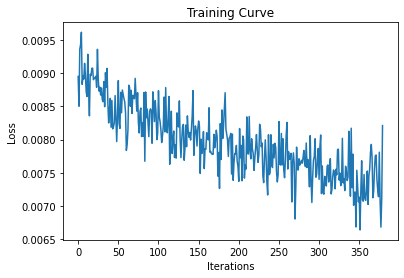

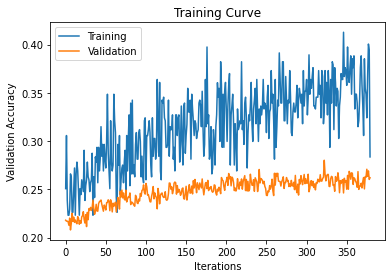

Final Training Accuracy: 0.3766961891606403
Final Validation Accuracy: 0.26203339882121807
Total time:   7284.84 s  Time per Epoch:  728.48 s 


In [ ]:
use_cuda = True
torch.cuda.empty_cache()

model_alex = alexnet
#alexnet.features = alexnet.features
model_name = "alexnet"
batch_size = 327

if use_cuda and torch.cuda.is_available():
  alexnet.cuda()
  model_alex.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')
  
#proper model
train(model_alex, model_name, batch_size=batch_size, num_epochs=10)

#Train model resnet

CUDA is available!  Training on GPU ...
Using resnet features
Iteration:  1 Progress:   0.66  % Time Elapsed:  19.06 s 
Iteration:  2 Progress:   1.32  % Time Elapsed:  37.88 s 
Iteration:  3 Progress:   1.97  % Time Elapsed:  56.84 s 
Iteration:  4 Progress:   2.63  % Time Elapsed:  75.94 s 
Iteration:  5 Progress:   3.29  % Time Elapsed:  94.84 s 
Iteration:  6 Progress:   3.95  % Time Elapsed:  113.60 s 
Iteration:  7 Progress:   4.61  % Time Elapsed:  132.50 s 
Iteration:  8 Progress:   5.26  % Time Elapsed:  151.52 s 
Iteration:  9 Progress:   5.92  % Time Elapsed:  170.40 s 
Iteration:  10 Progress:   6.58  % Time Elapsed:  189.55 s 
Iteration:  11 Progress:   7.24  % Time Elapsed:  208.51 s 
Iteration:  12 Progress:   7.89  % Time Elapsed:  227.57 s 
Iteration:  13 Progress:   8.55  % Time Elapsed:  246.63 s 
Iteration:  14 Progress:   9.21  % Time Elapsed:  265.63 s 
Iteration:  15 Progress:   9.87  % Time Elapsed:  284.42 s 
Iteration:  16 Progress:  10.53  % Time Elapsed:  30

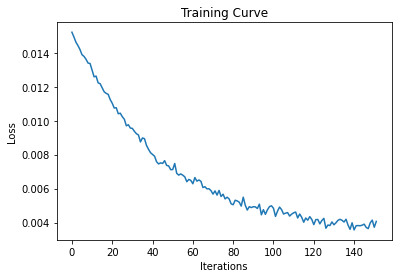

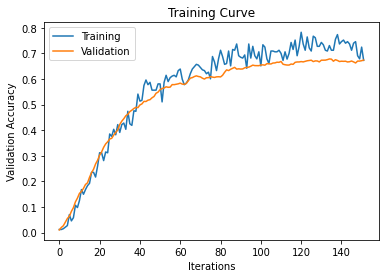

Final Training Accuracy: 0.7564800520029251
Final Validation Accuracy: 0.6741159135559921
Total time:   2876.06 s  Time per Epoch:  719.01 s 


In [ ]:
use_cuda = True
torch.cuda.empty_cache()

model_resnet = resnet
model_name = "resnet"
batch_size = 327

if use_cuda and torch.cuda.is_available():
  model_resnet.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')
  
#proper model
train(model_resnet, model_name, batch_size=batch_size, num_epochs=4)

#Train model wide_resnet

CUDA is available!  Training on GPU ...
Using wide_resnet features
Iteration:  1 Progress:   0.66  % Time Elapsed:  30.84 s 
Iteration:  2 Progress:   1.32  % Time Elapsed:  61.47 s 
Iteration:  3 Progress:   1.97  % Time Elapsed:  92.10 s 
Iteration:  4 Progress:   2.63  % Time Elapsed:  122.79 s 
Iteration:  5 Progress:   3.29  % Time Elapsed:  153.40 s 
Iteration:  6 Progress:   3.95  % Time Elapsed:  184.13 s 
Iteration:  7 Progress:   4.61  % Time Elapsed:  214.72 s 
Iteration:  8 Progress:   5.26  % Time Elapsed:  245.44 s 
Iteration:  9 Progress:   5.92  % Time Elapsed:  276.13 s 
Iteration:  10 Progress:   6.58  % Time Elapsed:  306.84 s 
Iteration:  11 Progress:   7.24  % Time Elapsed:  337.49 s 
Iteration:  12 Progress:   7.89  % Time Elapsed:  368.18 s 
Iteration:  13 Progress:   8.55  % Time Elapsed:  398.95 s 
Iteration:  14 Progress:   9.21  % Time Elapsed:  429.56 s 
Iteration:  15 Progress:   9.87  % Time Elapsed:  460.00 s 
Iteration:  16 Progress:  10.53  % Time Elaps

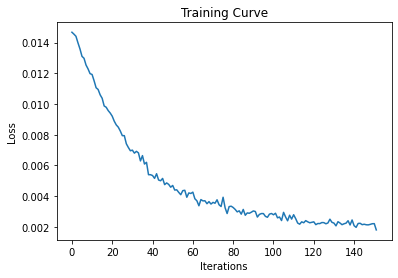

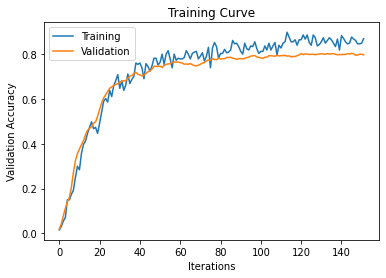

Final Training Accuracy: 0.8794182172747217
Final Validation Accuracy: 0.7978880157170923
Total time:   4638.54 s  Time per Epoch:  1159.63 s 


In [ ]:
use_cuda = True

model_wide_resnet = wide_resnet
model_name = "wide_resnet"
batch_size = 327 

if use_cuda and torch.cuda.is_available():
  model_wide_resnet.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')
  
#proper model
train(model_wide_resnet, model_name, batch_size=batch_size, num_epochs=4)

#Train model efficientnet

CUDA is available!  Training on GPU ...
Using efficientnet features
Iteration:  1 Progress:   2.63  % Time Elapsed:  39.67 s 
Iteration:  2 Progress:   5.26  % Time Elapsed:  79.09 s 
Iteration:  3 Progress:   7.89  % Time Elapsed:  118.45 s 
Iteration:  4 Progress:  10.53  % Time Elapsed:  157.88 s 
Iteration:  5 Progress:  13.16  % Time Elapsed:  197.21 s 
Iteration:  6 Progress:  15.79  % Time Elapsed:  236.73 s 
Iteration:  7 Progress:  18.42  % Time Elapsed:  276.13 s 
Iteration:  8 Progress:  21.05  % Time Elapsed:  315.57 s 
Iteration:  9 Progress:  23.68  % Time Elapsed:  355.03 s 
Iteration:  10 Progress:  26.32  % Time Elapsed:  394.58 s 
Iteration:  11 Progress:  28.95  % Time Elapsed:  433.99 s 
Iteration:  12 Progress:  31.58  % Time Elapsed:  473.52 s 
Iteration:  13 Progress:  34.21  % Time Elapsed:  512.95 s 
Iteration:  14 Progress:  36.84  % Time Elapsed:  552.41 s 
Iteration:  15 Progress:  39.47  % Time Elapsed:  591.89 s 
Iteration:  16 Progress:  42.11  % Time Ela

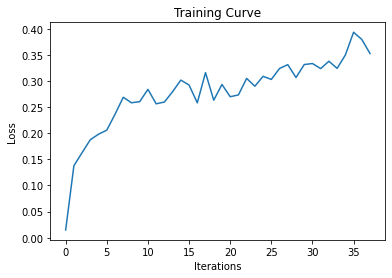

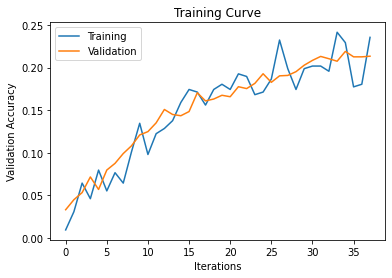

Final Training Accuracy: 0.23051921670593972
Final Validation Accuracy: 0.21340864440078586
Total time:   1499.31 s  Time per Epoch:  1499.31 s 


In [ ]:
use_cuda = True

model_efficientnet = efficientnet
model_name = "efficientnet"
batch_size = 327

if use_cuda and torch.cuda.is_available():
  model_efficientnet.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')
  
#proper model
train(model_efficientnet, model_name, batch_size=batch_size, num_epochs=1)

#Load trained models

In [ ]:

""" name of the model eg model_wide_resnet here must match the one that was saved 
eg you can't say efficientnet.load_state(...load(saved_resnet)). They have to match."""
torch.save(model_wide_resnet.state_dict(),'test_save') ## accompanying save
model_wide_resnet.load_state_dict(torch.load('/content/test_save'))

NameError: ignored

#Test one image at a time

In [ ]:
import time
import os
import numpy as np
import torch

import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt

In [ ]:
import PIL

###Process image

In [ ]:
model = model_resnet 

torch.Size([3, 500, 500])
57


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Text(0.5, 1.0, 'Newfoundland')

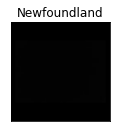

In [ ]:
import cv2
from PIL import Image
image = PIL.Image.open('/content/drive/MyDrive/APS360 Project/used_data/test.png') #chihuahua
image = PIL.Image.open('/content/drive/MyDrive/APS360 Project/used_data/japanese.png')
image = PIL.Image.open('/content/drive/MyDrive/rhinebeck/IMG_9302.JPG') #non dog image


#image = PIL.Image.open('/content/drive/MyDrive/APS360 Project/used_data/bluetick.png') 
#image = PIL.Image.open('/content/drive/MyDrive/APS360 Project/used_data/maltese.png') 
#image = PIL.Image.open('/content/drive/MyDrive/APS360 Project/used_data/gnretriever.png')
#image = PIL.Image.open('/content/drive/MyDrive/APS360 Project/used_data/newfoundland.png')
image = PIL.Image.open('/content/drive/MyDrive/APS360 Project/used_data/justwhiteimg.png')
image = PIL.Image.open('/content/drive/MyDrive/APS360 Project/used_data/justblackimg.png')
#image = PIL.Image.open('/content/drive/MyDrive/APS360 Project/used_data/chihuahua_jpeg?.jpeg')
#image = PIL.Image.open('/content/drive/MyDrive/APS360 Project/used_data/jpspaniel.jpg')

three_channels = torchvision.transforms.Grayscale(num_output_channels=3)
image = three_channels(image)
center_crop = torchvision.transforms.CenterCrop(500)
image = center_crop(image)
image = np.array(image)
#print(image.shape)
x = torch.from_numpy(image) # turn img into a PyTorch tensor
x = x.permute(2,0,1) # move the channel dimension to the beginning
print(x.shape)
x = x.reshape([1, 3, 500, 500]) # add a dimension for batching, apparently models expect to know batch size

#send image to cuda
x = x.cuda()
output = model(x.float()) ##<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
#softmax
prob = torch.nn.functional.softmax(output, dim=None, _stacklevel=3, dtype=None)
prob = torch.max(prob, dim=1, keepdim=False, out=None) # find max index, returns (values, indices)
                                                    #https://pytorch.org/docs/stable/generated/torch.max.html
index = prob[1]   # x[0] - prob, x[1] - index
index = index.tolist() # tensor to list 
print(index[0])
#print(prob)

# plot the images in the batch, along with the corresponding labels
#pred = classes[int(index[0])] 
fig = plt.figure(figsize=(25, 4))
ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
plt.imshow(image)
ax.set_title(pred)


#Model's performance on test data, unseen data!

##Get model's accuracy of one epoch of the test data
Performance is calculated for each batch as opposed to whole data

In [ ]:
#for evaluating the model

def get_accuracy_on_test_data(model):

    data_loader = test_loader

    correct = 0
    total = 0
    acc = [] 
    for imgs, labels in data_loader:
        
         
        #############################################
        #To Enable GPU Usage
        if use_cuda and torch.cuda.is_available():
          imgs = imgs.cuda()
          #print('nope')
          labels = labels.cuda()
        #############################################
        
        output = model(imgs)
        
        #select index with maximum prediction score
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += imgs.shape[0]
        x = correct/ total
        acc.append(x)
        correct = 0
        total = 0

    return acc

###Plot performance

In [ ]:

def le_plot(iters):
  # plotting
  iters = list(range(0,len(test_loader)))
  plt.title("Testing Curve")
  plt.plot(iters, test_acc, label="Testing")
  #plt.plot(iters, val_acc, label="Validation")    
  plt.xlabel("Batches")
  plt.ylabel("Testing Accuracy")
  plt.legend(loc='best')
  plt.show()

  #train_acc.append(get_accuracy_on_test_data(model))
  #print("Final Training Accuracy: {}".format(train_acc[-1]))
  print("Average Test Accuracy: {}".format(sum(test_acc)/len(test_acc)))
  #print ("Total time:  % 6.2f s  Time per Epoch: % 6.2f s " % ( (end_time-start_time), ((end_time-start_time) / num_epochs) ))


###And Voila!

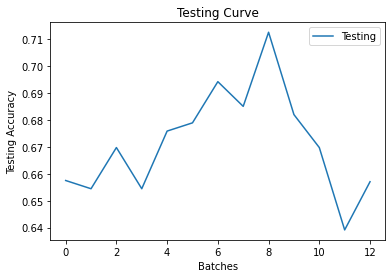

Average Test Accuracy: 0.6715718620464753


In [ ]:
model = resnet
test_acc = get_accuracy_on_test_data(model)
le_plot(test_acc)